# Introduction to Regression with Neural Networks in Tensorflow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating the data to view and fit

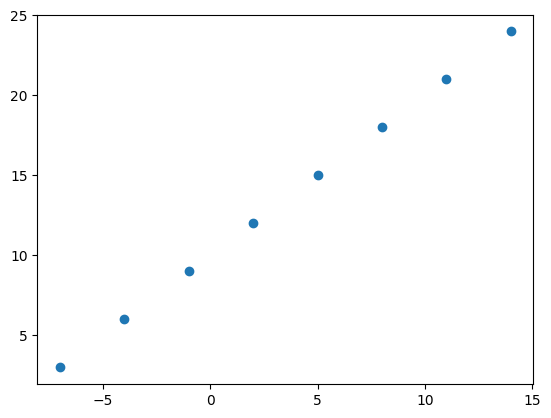

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Creating features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
# Creating labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
# Visualization
plt.scatter(X,y)

## Input and Output shapes


In [ ]:
# Creating a demo tensor for our housing price prediction problem statement
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([876231])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([876231], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
X[0].ndim # scalar tensor

0

In [ ]:
# Turning our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
# IF facing issue in dtype error while modelling, then cast the tenosrs in float32

In [ ]:
# Now, checking the shape again
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape,X[0].ndim

(TensorShape([8]), TensorShape([8]), 0)

## Steps in modelling with TensorFlow

1. Creating a model - defining the input and output layers, as well as the hidden layers of a deep learning model.

2. Compiling a model - defining the loss function, optimizer and evaluation metrics

3. Fitting the model - letting the model try to find the patterns between X & y

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Creating a model using Sequential API {Sequential groups a linear stack of layers into a tf.keras.Model AND Sequential provides training and inference features on this model}
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is mean absolute error [loss = mean(abs(y_true - y_pred), axis=-1)]
              optimizer=tf.keras.optimizers.SGD(), # SGD is Stochastic Gradient Descent
              metrics=["mae"])

#3. Fitting the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # Start with 5 epochs first

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 16.1781 - mae: 16.1781
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 15.8969 - mae: 15.8969
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 15.6156 - mae: 15.6156
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 15.3344 - mae: 15.3344
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 15.0531 - mae: 15.0531
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 14.8292 - mae: 14.8292
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 14.6967 - mae: 14.6967
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 14.5642 - mae: 14.5642
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 14.4317 - mae: 14.4317
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 14.2992 - mae: 14.2992
Epoch 11/100
1/1 [==============================] - 0s 9ms

In [ ]:
# Now we will make predictions with our model
model.predict([17])

1/1 [==============================] - 0s 72ms/step


array([[29.364412]], dtype=float32)

# Improving our model
* We might add more layers
* Increase the number of hidden units (or neurons)
* Change the activation function of each layer
* We might change the optimization function or learning rate of the optimization function
* Increase the epochs ( I Already took 100 in above model, although you should first observe the loss and mae with 5 epochs before changing it to 100 )

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1),
])

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 12.9938 - mae: 12.9938
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 12.2868 - mae: 12.2868
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 11.5799 - mae: 11.5799
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 11.0011 - mae: 11.0011
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 10.4978 - mae: 10.4978
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 9.9719 - mae: 9.9719
Epoch 7/100
1/1 [==============================] - 0s 30ms/step - loss: 9.4213 - mae: 9.4213
Epoch 8/100
1/1 [==============================] - 0s 24ms/step - loss: 8.8432 - mae: 8.8432
Epoch 9/100
1/1 [==============================] - 0s 27ms/step - loss: 8.2382 - mae: 8.2382
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 7.5987 - mae: 7.5987
Epoch 11/100
1/1 [==============================] - 0s 19ms/s

In [ ]:
model.predict([17])

1/1 [==============================] - 0s 58ms/step


array([[27.137358]], dtype=float32)

## Evaluating Our model

In practice, a typical workflow we go through when builiding a Neural Network is:
```
Build a model --> fit it --> evaluate it --> tweak a model --> fit it --> evaluate it --> tweak a model --> fit it --> evaluate it

 ```

 When it comes to evaluation, there are 3 words you should memorize:
> "Visualize", "Visualize", "Visualize"

It's a good idea to visualize:
* The data
* The model itself
* The predictions

In [ ]:
# Making the dataset bigger
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

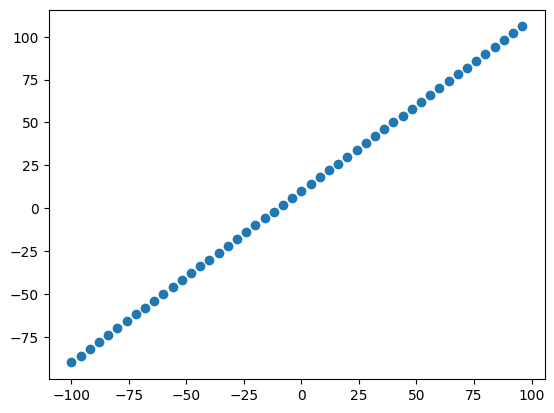

In [ ]:
# Visualizing the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### The 3 sets...

* Training set - the model learns from this data, which is typically 70-80% of the total data you have available
* Validation set - the model gets tuned on this data, which is typically 10-15% of the data available.
* Test set - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available



In [ ]:
len(X) # Lenght of samples we have

50

In [ ]:
# Split the data into train and test set
X_train = X[:40] # first 40 are training samples ( 80% of the data )
y_train = y[:40]

X_test = X[40:] # last 10 are testting samples ( 20% of the data )
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualization of data in training and test set

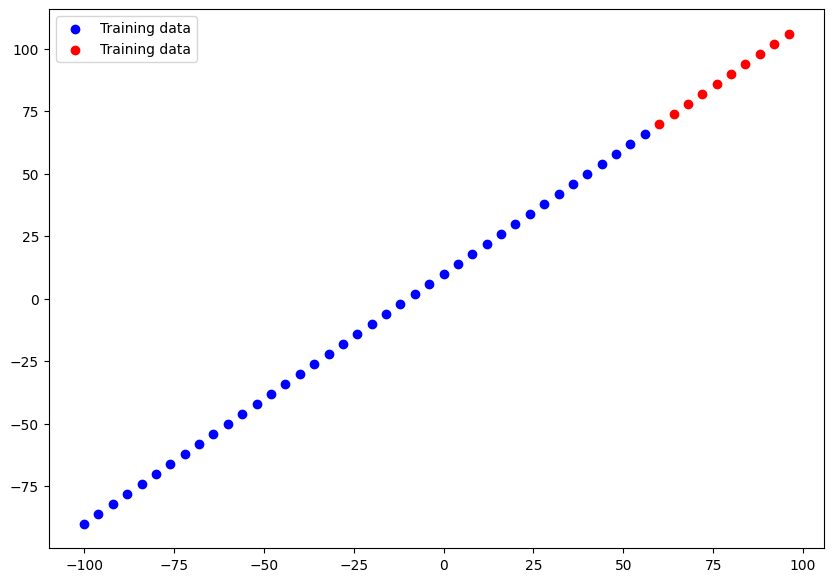

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b', label="Training data")
plt.scatter(X_test, y_test, c='r', label="Training data")
plt.legend()

In [ ]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer.

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1], name="input_layer"),# Dense layer is basically a fully connected layer
    tf.keras.layers.Dense(1,name="output_layer")
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - Total number of parameters in the model
* Trainable params - These are the parameters the model can update as it trains.
* Non-Trainable params - These are the parameters which aren't updated during training.


📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out [MIT's introduction to deep learning video](https://www.youtube.com/watch?v=QDX-1M5Nj7s)

In [ ]:
# Let's fit our data:

model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 21.4088 - mae: 21.4088
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 22.4681 - mae: 22.4681
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 27.9795 - mae: 27.9795
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 13.1524 - mae: 13.1524
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 17.1686 - mae: 17.1686
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 10.0720 - mae: 10.0720
Epoch 7/100
2/2 [==============================] - 0s 28ms/step - loss: 11.0421 - mae: 11.0421
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 11.0534 - mae: 11.0534
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 40.1065 - mae: 40.1065
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 27.5517 - mae: 27.5517
Epoch 11/100
2/2 [==============================] - 0s 1

In [ ]:
# Get a summary of our model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Visualizing our model

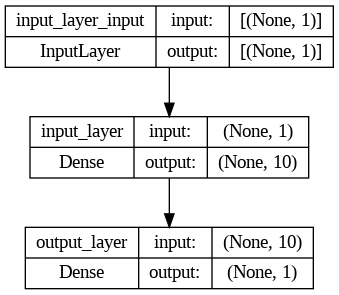

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes = True)

Visualizing the model's predictions

* To visualize predictions, it's a good idea to plot them against ground truth labels.

* Often you'll see this in the form of `y_test` or `y-true` versus `y-pred` (ground truth versus the model's predictions)

In [ ]:
# Making some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 104ms/step


array([[ 78.39613 ],
       [ 83.50375 ],
       [ 88.61139 ],
       [ 93.71902 ],
       [ 98.826645],
       [103.93428 ],
       [109.04191 ],
       [114.149536],
       [119.25717 ],
       [124.36481 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  """
  Plots training data, test data and compares it to the ground truth labels.
  """

  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend()

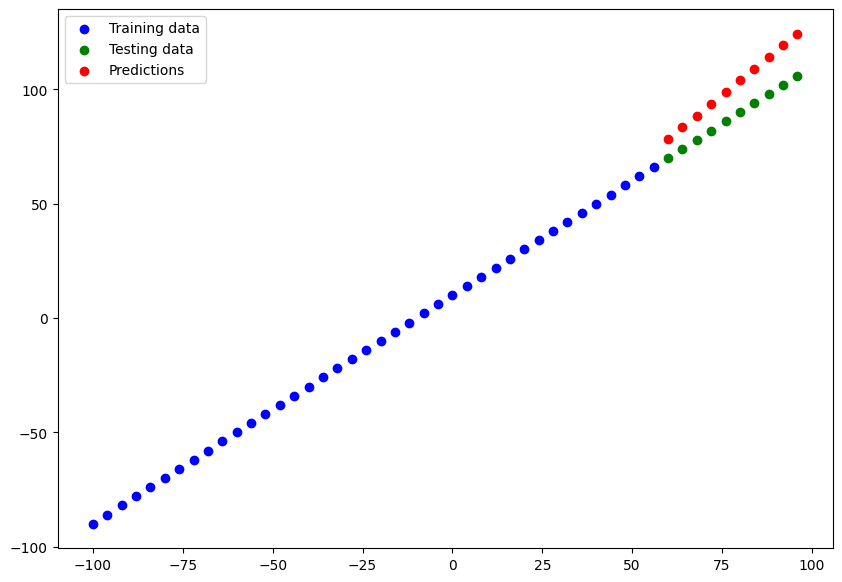

In [ ]:

plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics
Depending on the problem statement we're working on, there will be different evaluation metrics to evaluate our model's performance

For regression, we can use:
* **MAE** - mean absolute error, "On average, how wrong is each of my model's predictions"
* **MSE** - mean square error, "Square the average errors"
* **Huber** - Combination of MSE and MAE, Less sensitive to outliers than MSE



In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 463ms/step - loss: 13.3805 - mae: 13.3805


[13.380464553833008, 13.380464553833008]

In [ ]:
# calculating MAE
tf.metrics.mean_absolute_error(tf.constant(y_test),tf.constant(y_pred))

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([12.241547, 10.499249, 10.      , 10.743803, 12.895987, 16.347424,
       21.041908, 26.149536, 31.257172, 36.364807], dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 78.39613 ],
       [ 83.50375 ],
       [ 88.61139 ],
       [ 93.71902 ],
       [ 98.826645],
       [103.93428 ],
       [109.04191 ],
       [114.149536],
       [119.25717 ],
       [124.36481 ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

### We didn't get the exact value of MAE, becuase the y_test and y_pred have different shapes
So, we will remove dimension of size 1 from y_pred using tf.squeeze()

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 78.39613 ,  83.50375 ,  88.61139 ,  93.71902 ,  98.826645,
       103.93428 , 109.04191 , 114.149536, 119.25717 , 124.36481 ],
      dtype=float32)>

In [ ]:
# Again , calculating mae:
tf.metrics.mean_absolute_error(tf.constant(y_test),tf.constant(tf.squeeze(y_pred)))

<tf.Tensor: shape=(), dtype=float32, numpy=13.380465>

4.1631327 is the same value as we got earlier.

Similarly, MSE can be calculated

In [ ]:
tf.metrics.mean_squared_error(tf.constant(y_test),tf.constant(tf.squeeze(y_pred)))

<tf.Tensor: shape=(), dtype=float32, numpy=189.1583>

MSE is generally used when larger errors are more significant than smaller errors

In [ ]:
# Making functions for MAE and MSE, so that we can reuse them later:

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(tf.constant(y_test),tf.constant(tf.squeeze(y_pred)))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(tf.constant(y_test),tf.constant(tf.squeeze(y_pred)))


### Running experiments to improve our model

1. Get more data for the model to train on
2. Make the model larger - Using more layers/ more hidden units
3. Train for longer - giving model more of a chance to find patterns in the data

Let's do 3 modelling experiments:

1. `model_1` - Same model but trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
2. `model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**

In [ ]:
tf.random.set_seed(42) # this is used for the purpose of reproducibility

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.metrics.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["mae"])
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 5s 20ms/step - loss: 34.5255 - mae: 34.5255
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 34.3934 - mae: 34.3934
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 34.2647 - mae: 34.2647
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 34.1303 - mae: 34.1303
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 33.9966 - mae: 33.9966
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 33.8605 - mae: 33.8605
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 33.7205 - mae: 33.7205
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 33.5740 - mae: 33.5740
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 33.4343 - mae: 33.4343
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 33.2917 - mae: 33.2917
Epoch 11/500
2/2 [==============================] - 0s 8ms

1/1 [==============================] - 0s 119ms/step


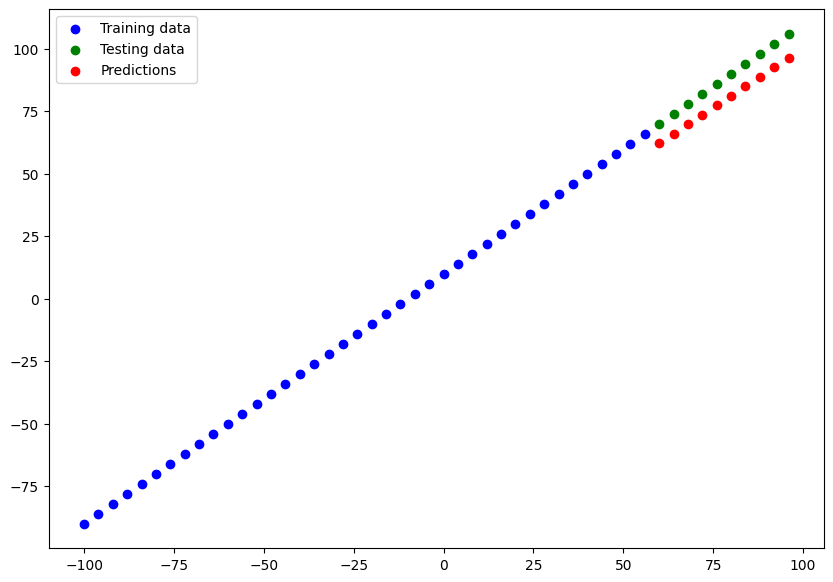

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions = y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, tf.squeeze(y_preds_1))
mse_1 = mse(y_test, tf.squeeze(y_preds_1))
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.68227>,
 <tf.Tensor: shape=(), dtype=float32, numpy=75.79146>)

**Build `model_2`**

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 12ms/step - loss: 42.7127 - mae: 42.7127
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 13.3645 - mae: 13.3645
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 12.0540 - mae: 12.0540
Epoch 4/500
2/2 [==============================] - 0s 9ms/step - loss: 8.7657 - mae: 8.7657
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 10.9824 - mae: 10.9824
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 10.1483 - mae: 10.1483
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 9.1717 - mae: 9.1717
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 9.1254 - mae: 9.1254
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 15.1929 - mae: 15.1929
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 7.8386 - mae: 7.8386
Epoch 11/500
2/2 [==============================] - 0s 7ms/step - 

1/1 [==============================] - 0s 41ms/step


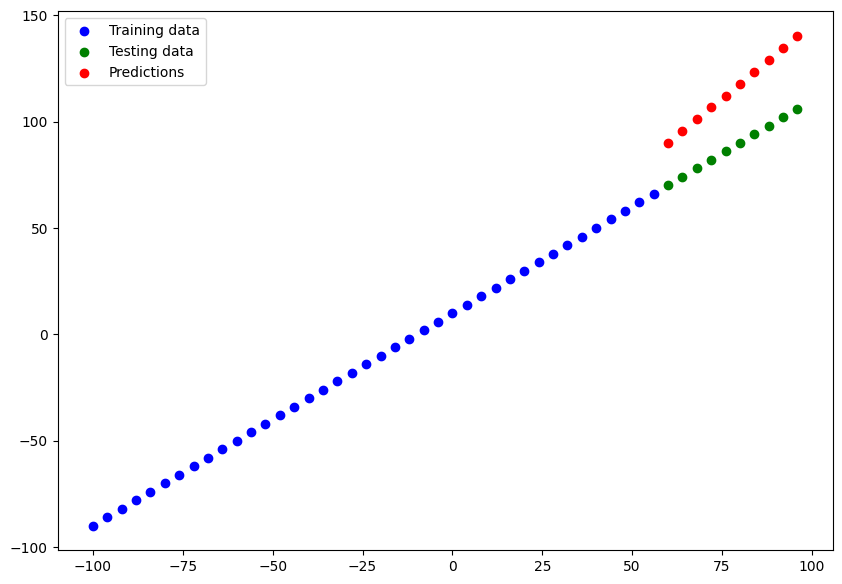

In [ ]:
# Make and plot predictions for model_1
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions = y_preds_2)

### DIY => Calculate model_2 evaluation metrics

🔑 **Note:** Start with small experiments (small models) and make sure that they work and then increase their scale when necessary.

## Comparing the results of experiments



In [ ]:
# You won't be able to run this code until you perform evaluation of model_2 :)


# import pandas as pd
# model_results = [["model_1",mae_1.numpy(),mse_1.numpy()],
#                  ["model_2",mae_2.numpy(),mse_2.numpy()]]

# all_results = pd.Dataframe(model_results, columns=["model","mae","mse"])
# all_results

## Tracking the experiments
One good habit in Machine learning modelling is to track the results of  experiments

**Resources** :  
* TensorBoard
* Weights and bias

## Saving our model
There are two main formats we use to save our model:
* HDF5 format (Hierarchical Data Format)
* SaveModel format


In [ ]:
model_1.save("regression_model") #SaveModel file format (pb is protobuf format)

In [ ]:
model_1.save("regression_model_1.h5") #HDF5 file format

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading a saved model

In [ ]:
load_our_model = tf.keras.models.load_model("/content/regression_model")

In [ ]:
load_our_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
 dense_9 (Dense)             (None, 1)                

### Download a model from google colab

1. Go to files tab and right click and select download.
2. Save it to google drive, by connecting (mounting) Google drive and copying it there
3. Use code ( see the cell below )


In [ ]:
# from google.colab import files
# files.download("/content/regression_model")

In [ ]:
# !cp /content/regression_model #(Enter the name of your drive path, where you want to save the model)
# To check, use !ls (then the path where you saved your model)

## Now the real game starts, we'll work on a real-world medical cost personal data
* Download the dataset from here: https://www.kaggle.com/datasets/mirichoi0218/insurance

* Upload the dataset on colab under the file section

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
insurance = pd.read_csv("insurance.csv")

In [ ]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
# One-hot encoding the categorical variables
# We can use pandas.get_dummies()

insurance = pd.get_dummies(insurance)

In [ ]:
insurance.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

In [ ]:
# sklearn.model_selection.train_test_split => Split arrays or matrices into random train and test subsets.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

len(X),len(X_train),len(X_test)


(1338, 896, 442)

In [ ]:
X_train   # all the indexes are randomly shuffled

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1046,43,25.080,0,1,0,1,0,1,0,0,0
682,39,35.300,2,0,1,0,1,0,0,0,1
1037,45,30.495,1,1,0,0,1,0,1,0,0
490,19,32.900,0,1,0,1,0,0,0,0,1
39,60,39.900,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [ ]:
tf.random.set_seed(42)

medical_cost_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

medical_cost_model.compile(loss = tf.keras.losses.mae,
                           optimizer = tf.keras.optimizers.SGD(),
                           metrics=["mae"])

medical_cost_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
28/28 [==============================] - 1s 3ms/step - loss: 8929.4541 - mae: 8929.4541
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 7828.5698 - mae: 7828.5698
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 7922.0361 - mae: 7922.0361
Epoch 4/100
28/28 [==============================] - 0s 3ms/step - loss: 8081.3521 - mae: 8081.3521
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 7655.7466 - mae: 7655.7466
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 7690.0283 - mae: 7690.0283
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 7614.0601 - mae: 7614.0601
Epoch 8/100
28/28 [==============================] - 0s 2ms/step - loss: 7601.4385 - mae: 7601.4385
Epoch 9/100
28/28 [==============================] - 0s 3ms/step - loss: 7740.7837 - mae: 7740.7837
Epoch 10/100
28/28 [==============================] - 0s 3ms/step - loss: 7849.1885 - mae: 7849.1885

In [ ]:
# Check the results of insurance model on the test data
medical_cost_model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 2ms/step - loss: 7410.2764 - mae: 7410.2764


[7410.2763671875, 7410.2763671875]

In [ ]:
y_train.median(), y_train.mean()

(9556.297050000001, 13379.68825002232)

Our model isn't performing well, so we'll work on improving it

In [ ]:
tf.random.set_seed(42)
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=["mae"])

history = insurance_model_2.fit(X_train, y_train, epochs = 500, verbose = 1)

Epoch 1/500
28/28 [==============================] - 1s 3ms/step - loss: 13361.7061 - mae: 13361.7061
Epoch 2/500
28/28 [==============================] - 0s 3ms/step - loss: 13269.5645 - mae: 13269.5645
Epoch 3/500
28/28 [==============================] - 0s 2ms/step - loss: 13101.4277 - mae: 13101.4277
Epoch 4/500
28/28 [==============================] - 0s 2ms/step - loss: 12775.2129 - mae: 12775.2129
Epoch 5/500
28/28 [==============================] - 0s 3ms/step - loss: 12196.1230 - mae: 12196.1230
Epoch 6/500
28/28 [==============================] - 0s 3ms/step - loss: 11277.0146 - mae: 11277.0146
Epoch 7/500
28/28 [==============================] - 0s 3ms/step - loss: 10084.0938 - mae: 10084.0938
Epoch 8/500
28/28 [==============================] - 0s 3ms/step - loss: 8839.3379 - mae: 8839.3379
Epoch 9/500
28/28 [==============================] - 0s 3ms/step - loss: 7922.2275 - mae: 7922.2275
Epoch 10/500
28/28 [==============================] - 0s 3ms/step - loss: 7562.7461 - 

One observation while i was experimenting - I got NaN loss when i used SGD as the optimizer

In [ ]:
# Evaluating this model
insurance_model_2.evaluate(X_test, y_test)

14/14 [==============================] - 0s 3ms/step - loss: 3234.6875 - mae: 3234.6875


[3234.6875, 3234.6875]

Text(0.5, 0, 'epochs')

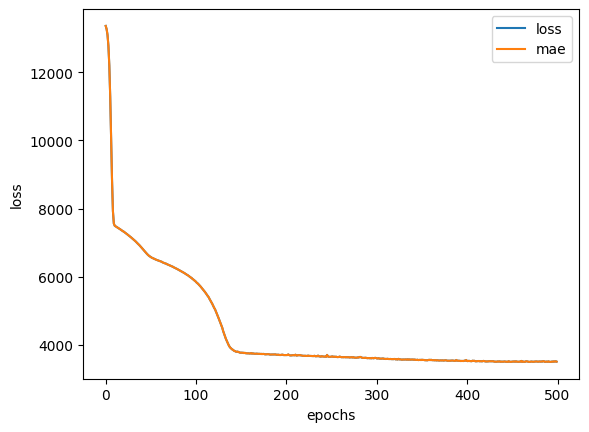

In [ ]:
# Plotting history (Loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**Question** => How long should we train for?

**Answer** => Tensorflow early stopping callback (We'll cover it later)

## Normalization and Standardization (Scaling features)

* The goal of normalization is to transform features to be on a similar scale. This improves the performance and training stability of the model.

* Standardization removes the mean and divides each value by the standard deviation (It's used when we want to transform a feature to have close to normal distribution)




<Axes: ylabel='Frequency'>

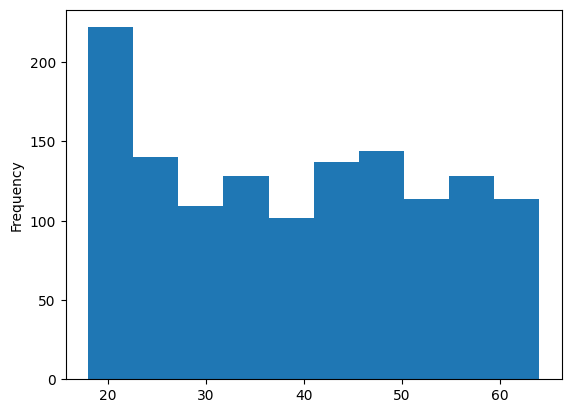

In [ ]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

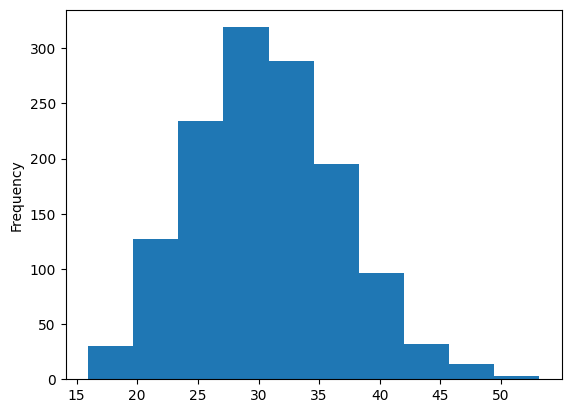

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
insurance_clean = pd.read_csv("insurance.csv")

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder (handle_unknown = "ignore"),["sex","smoker","region"])
)

X = insurance_clean.drop("charges", axis=1)
y = insurance_clean["charges"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [ ]:
tf.random.set_seed(42)

model_new = tf.keras.Sequential([
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_new.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr=0.0001),
                metrics = ["mae"])


model_new.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13295.4805 - mae: 13295.4805
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 12503.6943 - mae: 12503.6943
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 9437.9473 - mae: 9437.9473
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7846.1460 - mae: 7846.1460
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7510.9775 - mae: 7510.9775
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7152.5029 - mae: 7152.5029
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 6656.4180 - mae: 6656.4180
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 5949.3472 - mae: 5949.3472
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 4943.6714 - mae: 4943.6714
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 4006.3416 - mae: 4006.

In [ ]:
model_new.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3171.6191 - mae: 3171.6191


[3171.619140625, 3171.619140625]

# 🎉Congratulations!!, you have now successfully completed  all the steps
# 🏃‍♂️ Now, go ahead and  test your newly-found skills on a real-world dataset